In [102]:
from ipynb.fs.full.task1_new import ottieniDescrittore
import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot


In [103]:
# import OS module
import os

# Get the list of all files and directories
path = "./olivetti_PNG_master/images/"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
dir_list.sort()
dir_list.remove('.DS_Store')

# prints all files
# print(dir_list)


Files and directories in ' ./olivetti_PNG_master/images/ ' :


In [104]:
dictionaryOfColorMomentsDescriptors = {}

for i in range(0, len(dir_list)):
    colorMomentsOfImage = ottieniDescrittore(dir_list[i], 'ColorMoments')
    dictionaryOfColorMomentsDescriptors[dir_list[i]] = colorMomentsOfImage

In [105]:
dictionaryOfHOGDescriptors = {}

for i in range(0, len(dir_list)):
    HOGofImage = ottieniDescrittore(dir_list[i], 'HOG')
    dictionaryOfHOGDescriptors[dir_list[i]] = HOGofImage

[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[0.48765299 0.48765299 0.         ... 0.08296451 0.01249152 0.03335891]
[0.38619539 0.19142615 0.01739332 ... 0.         0.00879545 0.44692699]
[0.50868362 0.05095005 0.         ... 0.         0.02111302 0.1112641 ]
[0.44612816 0.01565625 0.0039905  ... 0.00636284 0.         0.17705465]
[0.53034093 0.00551584 0.0031375  ... 0.02705097 0.         0.1218691 ]
[0.33552551 0.04466087 0.00277739 ... 0.         0.00263698 0.07612845]
[0.41252437 0.41252437 0.03329625 ... 0.01039862 0.02357552 0.2381767 ]
[0.4491679  0.0151218  0.00113448 ... 0.01261532 0.00795593 0.20697132]
[0.42333909 0.         0.         ... 0.00316426 0.01042477 0.10791101]
[0.3450686  0.03236656 0.         ... 0.00272823 0.00186862 0.04774013]
[0.19071832 0.14910788 0.0057042  ... 0.         0.         0.11261207]
[0.50732239 0.00888792 0.         ... 0.         0.01882364 0.25723451]
[0.33991866 0.08118787 0.03038516 ... 0.01362329 0.0041809  0.07

In [106]:
dictionaryOfLBPDescriptors = {}

for i in range(0, len(dir_list)):
    LBPofImage = ottieniDescrittore(dir_list[i], 'LBP')
    dictionaryOfLBPDescriptors[dir_list[i]] = LBPofImage

In [107]:
dictionaryOfLBPDescriptors

{'image-0.png': array([[120,  56,  56, ..., 224, 224, 224],
        [ 60,  60,  60, ..., 227, 225, 193],
        [ 30,  28,  60, ..., 225, 227, 195],
        ...,
        [  0, 185,   0, ..., 223,  30,   0],
        [ 62,  13, 146, ..., 255,  46,   3],
        [ 14,   6, 143, ...,  13,   6, 131]], dtype=uint8),
 'image-1.png': array([[ 30,  63,  63, ..., 240, 248, 224],
        [ 62, 124,  60, ...,   0, 136, 128],
        [ 56, 124,  60, ...,  15,  15, 131],
        ...,
        [ 62,  27,  24, ...,  15, 143, 131],
        [ 30,  62,  94, ..., 255, 255, 227],
        [ 14,   4, 142, ..., 136, 136, 128]], dtype=uint8),
 'image-10.png': array([[248,  56,  56, ..., 120, 120,  96],
        [253,  60,  60, ...,  24,  48, 224],
        [253,  60,  32, ..., 222,  48, 224],
        ...,
        [ 62,  42, 209, ..., 255,   2, 227],
        [ 60,  86, 255, ..., 253,  50, 227],
        [  4, 143,  13, ..., 143,  10, 129]], dtype=uint8),
 'image-100.png': array([[  0, 208, 184, ..., 224, 224, 224]

In [108]:
def getKsimilarImages(imageID, k, modelName):
    match modelName:
        case 'ColorMoments':
            return calculateDistanceOfColorMoments(imageID, k)
            

        case 'LBP':
            return calculateDistanceOfLBP(imageID, k)

        case 'HOG':
            return calculateDistanceOfHOG(imageID, k)

        case _:
            return "Errore, inserire un descrittore corretto"

In [109]:
def calculateDistanceOfColorMoments(imageID, k):
    colorMomentsOfInputImage = dictionaryOfColorMomentsDescriptors[imageID]
    numpyArr = np.array(colorMomentsOfInputImage)

    print(colorMomentsOfImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfColorMomentsDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)
        dictionaryOfDistances[key] = dist

    #print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))
    # Output: ['b', 'c', 'a']   

    #print(sortedDistances)

    # dict_items = sortedDistances.items()

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK

In [110]:
def calculateDistanceOfLBP(imageID, k):
    return


In [111]:
def calculateDistanceOfHOG(imageID, k):
    HOGOfInputImage = dictionaryOfHOGDescriptors[imageID]
    numpyArr = np.array(HOGOfInputImage)

    print(HOGOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfHOGDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)
        dictionaryOfDistances[key] = dist

    #print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))
    # Output: ['b', 'c', 'a']   

    #print(sortedDistances)

    # dict_items = sortedDistances.items()

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK


In [112]:
kSimilarImagesOfColorMoments = getKsimilarImages('image-0.png', 6, 'ColorMoments')

[199.8721301020408, 28.80876738707981, 0.1222815089124971]
[('image-0.png', 0.0), ('image-28.png', 3.810761222630942), ('image-249.png', 4.10401628889337), ('image-58.png', 4.415989443007275), ('image-9.png', 4.616094961286284), ('image-8.png', 4.655818088171796)]


Nome dell'immagine:  image-0.png
Color moments dell'immagine:  [182.61352040816325, 23.121584683078616, -0.20097105987073205]
Distanza dall'immagine in input:  0.0


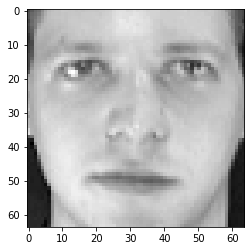

Nome dell'immagine:  image-28.png
Color moments dell'immagine:  [186.03316326530611, 19.96503485319131, -0.06357393043239129]
Distanza dall'immagine in input:  3.810761222630942


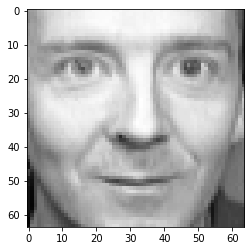

Nome dell'immagine:  image-249.png
Color moments dell'immagine:  [186.68973214285714, 23.711023767150074, 0.17805690666646318]
Distanza dall'immagine in input:  4.10401628889337


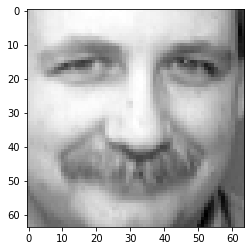

Nome dell'immagine:  image-58.png
Color moments dell'immagine:  [183.12723214285714, 22.86018971819917, 0.06523724418325909]
Distanza dall'immagine in input:  4.415989443007275


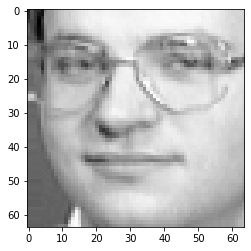

Nome dell'immagine:  image-9.png
Color moments dell'immagine:  [182.38679846938774, 22.45187318166294, 0.08002852039379274]
Distanza dall'immagine in input:  4.616094961286284


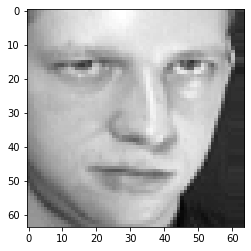

Nome dell'immagine:  image-8.png
Color moments dell'immagine:  [182.3577806122449, 22.743643982733467, 0.21789782732380528]
Distanza dall'immagine in input:  4.655818088171796


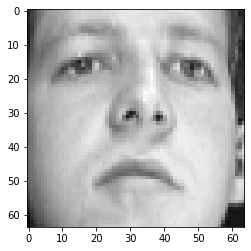

In [113]:
for i in range(0, len(kSimilarImagesOfColorMoments)):
    print("Nome dell'immagine: ", kSimilarImagesOfColorMoments[i][0])
    print("Color moments dell'immagine: ", dictionaryOfColorMomentsDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfColorMoments[i][1])

    imageName = kSimilarImagesOfColorMoments[i][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()

[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-7.png', 5.783940553473311), ('image-2.png', 5.956343736916993), ('image-6.png', 6.105350871706034), ('image-159.png', 6.247943878260108), ('image-152.png', 6.29368014004577)]
Nome dell'immagine:  image-0.png
HOG features dell'immagine:  [0.44739502 0.01961505 0.         ... 0.0862908  0.14739473 0.38505211]
Distanza dall'immagine in input:  0.0


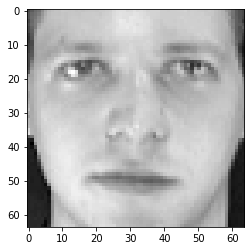

Nome dell'immagine:  image-7.png
HOG features dell'immagine:  [0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
Distanza dall'immagine in input:  5.783940553473311


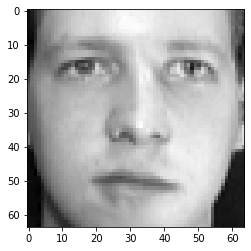

Nome dell'immagine:  image-2.png
HOG features dell'immagine:  [0.38886568 0.         0.         ... 0.00659168 0.02189671 0.03130397]
Distanza dall'immagine in input:  5.956343736916993


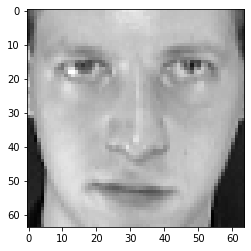

Nome dell'immagine:  image-6.png
HOG features dell'immagine:  [0.47741112 0.03733099 0.         ... 0.00219103 0.01412034 0.05430376]
Distanza dall'immagine in input:  6.105350871706034


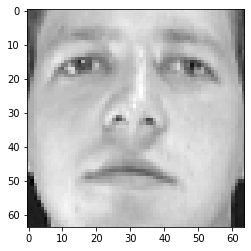

Nome dell'immagine:  image-159.png
HOG features dell'immagine:  [0.54092843 0.1143516  0.02070889 ... 0.01294059 0.02008991 0.40804863]
Distanza dall'immagine in input:  6.247943878260108


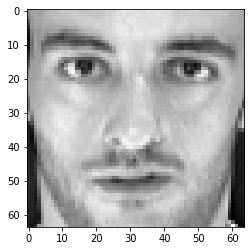

Nome dell'immagine:  image-152.png
HOG features dell'immagine:  [0.35258873 0.01126728 0.00507756 ... 0.32551169 0.2594441  0.39181965]
Distanza dall'immagine in input:  6.29368014004577


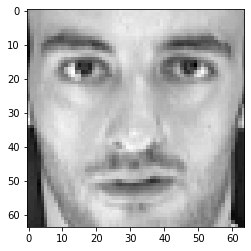

In [117]:
kSimilarImagesOfHOG = getKsimilarImages('image-0.png', 6, 'HOG')

for i in range(0, len(kSimilarImagesOfHOG)):
    print("Nome dell'immagine: ", kSimilarImagesOfHOG[i][0])
    print("HOG features dell'immagine: ", dictionaryOfHOGDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfHOG[i][1])

    imageName = kSimilarImagesOfHOG[i][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()